In [110]:
import pandas as pd
import re
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
def match (row):
    #this function takes in a row with school and facility data and returns true if school matches facility
    if row['School'] == 'socsc' or row['School'] == 'economics':
    
        if row['Facility'].strip() == 'SOE/SOSS':
            return True
        else:
            return False
    return row['Facility'].strip().lower()[-1] == row['School'][0]

# your_csv columns need to include -> Facility, School in this format
# SIS , sis
# LKCSB , sob
# SOA , accountancy
# SOE/SOSS, socsc or economics
# SOL, law


def find_matching(your_csv):
    data = pd.read_csv(your_csv)
    data2 = data
    #get only student's bookings
    data2 = data2.drop(data2[data2['Booked for User Org Unit'] != 'Student'].index)
    data2["match"] = data2.apply (lambda row: match(row), axis=1)
    return data2


def plot_graph(data2):
    count_facility = data2.groupby('Facility').size().reset_index(name='n')
    fig, ax = plt.subplots()
    count_facility.plot(kind='bar', x='Facility', y='n', ax=ax, figsize=(16, 6), color='tomato',)
    ax.set_ylabel("Count")
    ax.set_xlabel("Facility")
    plt.title("Total bookings per school", fontsize=16)
    plt.show()
    
    
# data2 = find_matching('final_final.csv')
# data2.to_csv(r'C:\Users\Jaslyn\DAPP\neww.csv')

In [112]:
data = pd.read_csv('final_final.csv')

In [113]:
data2 = data

In [114]:
data2 = data2.drop(data2[data2['Booked for User Org Unit'] != 'Student'].index)

In [115]:
data2['Booked for User Org Unit'].value_counts()

Student    14317
Name: Booked for User Org Unit, dtype: int64

In [116]:
data2

,Number,Day,Facility,Booking Time,Booked for User Org Unit,YOA,School
0,0,2/11/2020,LKCSB,12:00-15:30,Student,2018,business
1,1,2/11/2020,LKCSB,15:30-19:00,Student,2019,business
2,2,2/11/2020,LKCSB,11:30-15:30,Student,2016,business
3,3,2/11/2020,LKCSB,15:30-19:00,Student,2019,socsc
4,4,2/11/2020,LKCSB,11:30-15:30,Student,2018,socsc
...,...,...,...,...,...,...,...
15199,514,2/26/2020,SOL,16:30-18:30,Student,2019,law
15200,515,2/26/2020,SOL,18:30-21:00,Student,2018,accountancy
15201,516,2/26/2020,SOL,08:30-11:30,Student,2017,sis
15202,517,2/26/2020,SOL,11:30-15:30,Student,king,sa


In [117]:
count_facility = data2.groupby('Facility').size()
count_facility

Facility
LKCSB        5484
SIS          1267
SOA          1765
SOE/SOSS     4133
SOL          1668
dtype: int64

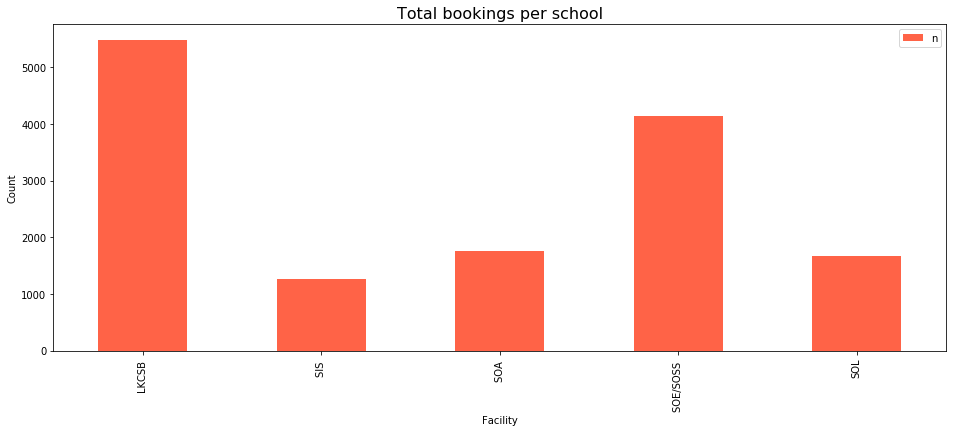

In [118]:
count_facility = data2.groupby('Facility').size().reset_index(name='n')


fig, ax = plt.subplots()
count_facility.plot(kind='bar', x='Facility', y='n', ax=ax, figsize=(16, 6), color='tomato',)
ax.set_ylabel("Count")
ax.set_xlabel("Facility")
plt.title("Total bookings per school", fontsize=16)
plt.show()

In [119]:
type(data2['Facility'])

pandas.core.series.Series

In [120]:
def match(facility, school):
    if facility[-1].lower() == school[0]:
        #matches
        return 1
    else:
        return 0

In [121]:
def match (row):
    if row['School'] == 'socsc' or row['School'] == 'economics':
    
        if row['Facility'].strip() == 'SOE/SOSS':
            return True
        else:
            return False
    return row['Facility'].strip().lower()[-1] == row['School'][0]

    
data2["match"] = data2.apply (lambda row: match(row), axis=1)

In [122]:
data2.head(300)

,Number,Day,Facility,Booking Time,Booked for User Org Unit,YOA,School,match
0,0,2/11/2020,LKCSB,12:00-15:30,Student,2018,business,True
1,1,2/11/2020,LKCSB,15:30-19:00,Student,2019,business,True
2,2,2/11/2020,LKCSB,11:30-15:30,Student,2016,business,True
3,3,2/11/2020,LKCSB,15:30-19:00,Student,2019,socsc,False
4,4,2/11/2020,LKCSB,11:30-15:30,Student,2018,socsc,False
...,...,...,...,...,...,...,...,...
321,321,2/10/2020,LKCSB,14:00-18:00,Student,2018,business,True
322,322,2/10/2020,LKCSB,18:00-22:00,Student,2018,accountancy,False
323,323,2/10/2020,LKCSB,10:30-14:30,Student,2017,socsc,False
324,324,2/10/2020,LKCSB,15:00-19:00,Student,2018,business,True


In [104]:
data2['School'].unique()

array(['business', 'socsc', 'accountancy', 'economics', 'law', 'sa',
       'mba', 'sis', 'nongrad', 'exchange', 'ddptechmgt', 'mcm', 'mi',
       'maf', 'smu', 'jd', 'mm', 'mhcl', 'mitb', 'mqf', 'mwm', 'mse',
       'mpa', 'mais', 'msa', 'phdecons', 'msps', 'phdps', 'llm'],
      dtype=object)

In [105]:
data2[(data2['School'] == 'socsc') & (data2['Facility'] == 'SOE/SOSS ')]

,Number,Day,Facility,Booking Time,Booked for User Org Unit,School,match
8826,5,2/11/2020,SOE/SOSS,15:30-17:30,Student,socsc,True
8833,12,2/11/2020,SOE/SOSS,15:30-19:30,Student,socsc,True
8835,14,2/11/2020,SOE/SOSS,16:00-18:30,Student,socsc,True
8845,24,2/11/2020,SOE/SOSS,12:00-13:00,Student,socsc,True
8851,30,2/11/2020,SOE/SOSS,16:00-19:00,Student,socsc,True
...,...,...,...,...,...,...,...
13260,1237,2/26/2020,SOE/SOSS,11:00-15:00,Student,socsc,True
13261,1238,2/26/2020,SOE/SOSS,15:00-19:00,Student,socsc,True
13262,1239,2/26/2020,SOE/SOSS,10:00-14:00,Student,socsc,True
13272,1249,2/26/2020,SOE/SOSS,14:00-18:00,Student,socsc,True


In [106]:
data2

,Number,Day,Facility,Booking Time,Booked for User Org Unit,School,match
0,0,2/11/2020,LKCSB,12:00-15:30,Student,business,True
1,1,2/11/2020,LKCSB,15:30-19:00,Student,business,True
2,2,2/11/2020,LKCSB,11:30-15:30,Student,business,True
3,3,2/11/2020,LKCSB,15:30-19:00,Student,socsc,False
4,4,2/11/2020,LKCSB,11:30-15:30,Student,socsc,False
...,...,...,...,...,...,...,...
15199,514,2/26/2020,SOL,16:30-18:30,Student,law,True
15200,515,2/26/2020,SOL,18:30-21:00,Student,accountancy,False
15201,516,2/26/2020,SOL,08:30-11:30,Student,sis,False
15202,517,2/26/2020,SOL,11:30-15:30,Student,sa,False
